# Copernicus data
In this notebook we download observation data from Copernicus for some chosen stations.

### Load packages

In [1]:
import copernicusmarine
from pprint import pprint
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

### Define parameters

In [2]:
username = 'mjessen'
password = 'gM-Rzb4cS4Lwudk'
dataset_id = 'cmems_obs-ins_glo_phybgcwav_mynrt_na_irr'
part = 'latest'
params_cat = 'waves'
feature = 'TS'

start_date = '2024-01-01'
end_date = '2024-01-02'

north = 56
south = 50
west = -2
east = 10

### Read index file

In [11]:
df = pd.read_csv("copernicus-data/index_monthly.txt", skiprows=5)
print(df.shape)
df.columns

(542559, 12)


Index(['# product_id', 'file_name', 'geospatial_lat_min', 'geospatial_lat_max',
       'geospatial_lon_min', 'geospatial_lon_max', 'time_coverage_start',
       'time_coverage_end', 'institution', 'date_update', 'data_mode',
       'parameters'],
      dtype='object')

### Filter stations by location and parameters

In [155]:
# Filter by location and parameters
filtered_df = df[(df['geospatial_lat_min'] > south) &
                 (df['geospatial_lat_max'] < north) &
                 (df['geospatial_lon_min'] > west) &
                 (df['geospatial_lon_max'] < east) &
                 (df['geospatial_lon_max'] == df['geospatial_lon_min'] ) &
                 (df['geospatial_lat_max'] == df['geospatial_lat_min'] ) &
                 (df['parameters'].str.contains("VHM0", na=False)) &
                 (df['parameters'].str.contains("VTZA", na=False)) &
                 #(df['parameters'].str.contains("VTM01", na=False)) | (df['parameters'].str.contains("VTM02", na=False))
                 (df['file_name'].str.contains('202201')) &
                 (df['file_name'].str.contains('Q1'))
                ]

print(filtered_df.shape)

# Copy df for later use
file_df = filtered_df[['file_name']].copy()

# Print basenames of filenames
file_names = file_df['file_name']
for name in file_names:
    basename = os.path.basename(name)
    print(basename)

(2, 12)
NO_TS_MO_Q11_202201.nc
NO_TS_MO_Q1_202201.nc


### Add to stations.txt file

In [14]:
with open("stations.txt", "w") as f:
    f.write('AkkaertSouthwestBuoy\n')
    f.write('Europlatform2\n')
    f.write('Europlatform3\n')
    f.write('WaddenEierlandseGat\n')
    f.write('F16\n')
    f.write('F3platform\n')
    f.write('6202108\n')
    f.write('J61\n')
    f.write('K13a_\n')
    f.write('K141_\n')
    f.write('L91_\n')
    f.write('LichteilandGoeree1_\n')
    f.write('Q1_\n')
    f.write('WesthinderBuoy\n')

### Open stations.txt file

In [15]:
with open("stations.txt", "r") as f:
    station_files = [line.strip() for line in f if line.strip()]

station_files

['AkkaertSouthwestBuoy',
 'Europlatform2',
 'Europlatform3',
 'WaddenEierlandseGat',
 'F16',
 'F3platform',
 '6202108',
 'J61',
 'K13a_',
 'K141_',
 'L91_',
 'LichteilandGoeree1_',
 'Q1_',
 'WesthinderBuoy']

### Create dataframe with stations

In [16]:
# Modify station files
pattern = "|".join(re.escape(s) for s in station_files)  # escape in case of special characters

# Filter by location and parameters
filtered_df = df[(df['file_name'].str.contains(pattern, na=False))
                 & (df['file_name'].str.contains('202201'))
                ]

print(filtered_df.shape)

# Copy df for later use
file_df = filtered_df[['file_name']].copy()

# Print basenames of filenames
file_names = file_df['file_name']
for name in file_names:
    basename = os.path.basename(name)
    print(basename)

(15, 12)
NO_TS_MO_6202108_202201.nc
NO_TS_MO_AkkaertSouthwestBuoy_202201.nc
NO_TS_MO_Europlatform2_202201.nc
NO_TS_MO_Europlatform3_202201.nc
NO_TS_MO_F3platform_202201.nc
NO_TS_MO_J61_202201.nc
NO_TS_MO_K13a_202201.nc
NO_TS_MO_K141_202201.nc
NO_TS_MO_L91_202201.nc
NO_TS_MO_LichteilandGoeree1_202201.nc
NO_TS_MO_Q1_202201.nc
NO_TS_MO_WaddenEierlandseGat_202201.nc
NO_TS_MO_WesthinderBuoy_202201.nc
NO_TS_TG_F3platformTG_202201.nc
NO_TS_TG_J61TG_202201.nc


### Create stations.csv file

In [19]:
stations_data = []

for station in station_files:
    for name in filtered_df['file_name']:
        if station in name:
            row = filtered_df[filtered_df['file_name'] == name]
            lat, lon = row['geospatial_lat_min'].values[0], row['geospatial_lon_min'].values[0]
            stations_data.append({'station': station, 'lat': lat, 'lon': lon})

station_df = pd.DataFrame(stations_data)
#print(station_df)

# Keep only unique rows
df_unique = station_df.drop_duplicates(subset='station', keep='first')
print(df_unique)

# Save to CSV
#df_unique.to_csv('../observations/stations.csv', index=False)

                 station       lat      lon
0   AkkaertSouthwestBuoy  51.41600  2.81900
1          Europlatform2  51.99861  3.27639
2          Europlatform3  51.99861  3.27639
3    WaddenEierlandseGat  53.27694  4.66167
4             F3platform  54.85389  4.72750
6                6202108  54.01433  6.58385
7                    J61  53.81663  2.95000
9                  K13a_  53.21778  3.22000
10                 K141_  53.26671  3.63327
11                  L91_  53.61380  4.96070
12   LichteilandGoeree1_  51.92583  3.66972
13                   Q1_  52.92640  4.15060
14        WesthinderBuoy  51.38110  2.43580


### Create output txt file with files to download

In [20]:
pattern

'AkkaertSouthwestBuoy|Europlatform2|Europlatform3|WaddenEierlandseGat|F16|F3platform|6202108|J61|K13a_|K141_|L91_|LichteilandGoeree1_|Q1_|WesthinderBuoy'

In [21]:
# Filter by location and parameters
filtered_df = df[(df['file_name'].str.contains(pattern, na=False))
                 & ( (df['file_name'].str.contains('2021')) | (df['file_name'].str.contains('2022')) )
                ]

print(filtered_df.shape)

# Copy df for later use
file_df = filtered_df[['file_name']].copy()

(366, 12)


In [22]:
with open("output.txt", "w") as f:
    for filename in file_df["file_name"]:
        f.write(str(filename) + "\n")

# Define list with files to download
file_list = 'output.txt'

# Define output storage parameters
output_directory = './raw-data'

### Download files

In [200]:
# Download the file to the station folder 
copernicusmarine.get(
    username=username,
    password=password,
    dataset_id=dataset_id,
    index_parts=False,
    file_list = file_list,
    output_directory=output_directory,
    no_directories=True
)


INFO - 2025-07-08T08:28:23Z - Selected dataset version: "202311"
INFO - 2025-07-08T08:28:23Z - Selected dataset part: "latest"


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/CT/202112/BO_PR_CT_SMHIF16_202112.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/CT/202112/BO_PR_CT_SMHIF16_202112.nc', file_size=0.10954856872558594, last_modified_datetime='2024-06-18T21:24:31+00:00', etag='"bbdcdec68c280eeaf51ec838539b0d50"', file_format='.nc', output_directory=WindowsPath('raw-data'), filename='BO_PR_CT_SMHIF16_202112.nc', file_path=WindowsPath('raw-data/BO_PR_CT_SMHIF16_202112.nc'), file_status='DOWNLOADED'), FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/CT/202212/BO_PR_CT_SMHIF16_202212.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT

## Load data

In [ ]:
path = './raw-data/observations'
file = 'NO_TS_MO_WaddenEierlandseGat_202406.nc'

ds = xr.open_dataset(path + '/' + file)

In [145]:
ds.data_vars

Data variables:
    TIME_QC  (TIME) int8 4kB ...
    VTPK     (TIME, DEPTH) float32 34kB ...
    VTPK_QC  (TIME, DEPTH) float32 34kB ...
    VAVT     (TIME, DEPTH) float32 34kB ...
    VAVT_QC  (TIME, DEPTH) float32 34kB ...
    TEMP     (TIME, DEPTH) float32 34kB ...
    TEMP_QC  (TIME, DEPTH) float32 34kB ...
    VAVH     (TIME, DEPTH) float32 34kB ...
    VAVH_QC  (TIME, DEPTH) float32 34kB ...
    SWHT     (TIME, DEPTH) float32 34kB ...
    SWHT_QC  (TIME, DEPTH) float32 34kB ...
    VTZA     (TIME, DEPTH) float32 34kB ...
    VTZA_QC  (TIME, DEPTH) float32 34kB ...
    VMDR     (TIME, DEPTH) float32 34kB ...
    VMDR_QC  (TIME, DEPTH) float32 34kB ...
    VHM0     (TIME, DEPTH) float32 34kB ...
    VHM0_QC  (TIME, DEPTH) float32 34kB ...

### Plot wave height

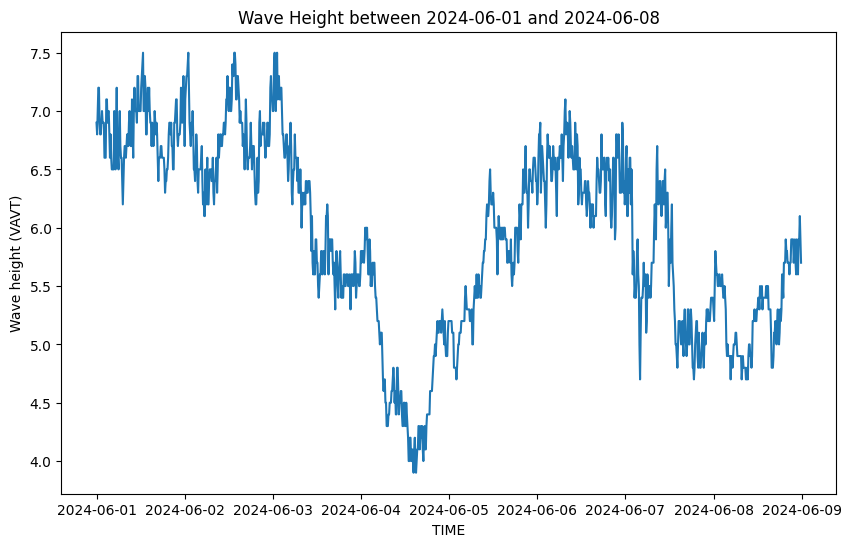

In [153]:
start_date = '2024-06-01'
end_date = '2024-06-08'


plt.figure(figsize=(10, 6))
# Select data for the specified time range
subset_data = ds.sel(TIME=slice(start_date, end_date))
VAVT = subset_data.VAVT
VHM0 = subset_data.VHM0
DEPH = subset_data.DEPH

plt.title('Wave Height between {} and {}'.format(start_date, end_date))
plt.xlabel('TIME')
plt.ylabel('Wave height (VAVT)')
plt.plot(subset_data.TIME,VAVT)
plt.show()